In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report



In [101]:
abide = pd.read_csv('abide2.tsv', sep='\t')
abide.insert(6, 'temp', abide['age_resid'])
abide.drop('age_resid', axis=1, inplace=True)
abide.rename(columns={'temp': 'age_resid'}, inplace=True)
features = abide.filter(like='fs')
phenotypes = abide.iloc[:, :6]


In [103]:
features

,fsArea_L_V1_ROI,fsArea_L_MST_ROI,fsArea_L_V6_ROI,fsArea_L_V2_ROI,fsArea_L_V3_ROI,fsArea_L_V4_ROI,fsArea_L_V8_ROI,fsArea_L_4_ROI,fsArea_L_3b_ROI,fsArea_L_FEF_ROI,...,fsCT_R_p47r_ROI,fsCT_R_TGv_ROI,fsCT_R_MBelt_ROI,fsCT_R_LBelt_ROI,fsCT_R_A4_ROI,fsCT_R_STSva_ROI,fsCT_R_TE1m_ROI,fsCT_R_PI_ROI,fsCT_R_a32pr_ROI,fsCT_R_p24_ROI
0,2750.0,306.0,354.0,2123.0,1451.0,1128.0,269.0,1751.0,1338.0,632.0,...,3.362,2.827,2.777,2.526,3.202,3.024,3.354,2.629,2.699,3.179
1,2836.0,186.0,354.0,2261.0,1584.0,1241.0,259.0,1521.0,1105.0,302.0,...,2.809,3.539,2.944,2.769,3.530,3.079,3.282,2.670,2.746,3.324
2,3394.0,223.0,373.0,2827.0,1816.0,1299.0,221.0,1657.0,1374.0,456.0,...,2.435,3.321,2.799,2.388,3.148,3.125,3.116,2.891,2.940,3.232
3,3382.0,266.0,422.0,2686.0,1893.0,1359.0,234.0,1889.0,1545.0,407.0,...,3.349,3.344,2.694,3.030,3.258,2.774,3.383,2.696,3.014,3.264
4,3080.0,161.0,346.0,2105.0,1307.0,1004.0,254.0,1334.0,985.0,315.0,...,2.428,2.940,2.809,2.607,3.430,2.752,2.645,3.111,3.219,4.128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,3321.0,290.0,381.0,2802.0,1827.0,1314.0,184.0,1992.0,1668.0,579.0,...,2.553,3.502,2.955,2.873,3.074,2.849,2.941,2.863,2.854,3.265
1000,2860.0,162.0,456.0,2460.0,1718.0,1225.0,240.0,2459.0,1721.0,574.0,...,2.437,3.658,2.537,2.482,3.425,2.819,3.304,2.688,3.200,3.086
1001,3377.0,177.0,497.0,2810.0,1866.0,1343.0,254.0,1758.0,1318.0,436.0,...,2.770,3.422,2.925,3.028,3.285,2.717,3.073,2.899,3.029,3.292
1002,3322.0,297.0,426.0,2640.0,1726.0,1242.0,318.0,1719.0,1310.0,444.0,...,2.579,3.328,2.998,3.062,3.601,3.049,2.901,2.704,3.076,3.114


In [105]:
y = phenotypes['group']

In [107]:
y = y.replace(2, 0)
y

0       1.0
1       1.0
2       0.0
3       1.0
4       0.0
       ... 
999     0.0
1000    0.0
1001    0.0
1002    0.0
1003    1.0
Name: group, Length: 1004, dtype: float64

In [109]:
scaler = StandardScaler()

X = scaler.fit_transform(features)

In [111]:
X= pd.DataFrame(X, columns = features.columns)
X

,fsArea_L_V1_ROI,fsArea_L_MST_ROI,fsArea_L_V6_ROI,fsArea_L_V2_ROI,fsArea_L_V3_ROI,fsArea_L_V4_ROI,fsArea_L_V8_ROI,fsArea_L_4_ROI,fsArea_L_3b_ROI,fsArea_L_FEF_ROI,...,fsCT_R_p47r_ROI,fsCT_R_TGv_ROI,fsCT_R_MBelt_ROI,fsCT_R_LBelt_ROI,fsCT_R_A4_ROI,fsCT_R_STSva_ROI,fsCT_R_TE1m_ROI,fsCT_R_PI_ROI,fsCT_R_a32pr_ROI,fsCT_R_p24_ROI
0,-0.829942,1.164264,-0.617506,-1.429303,-1.262839,-0.828693,0.112244,-0.246071,-0.313098,1.956778,...,2.364904,-0.913419,0.315561,-0.580204,0.089160,0.650036,0.806525,-0.195324,-0.480189,-0.055639
1,-0.656456,-0.587979,-0.617506,-1.027515,-0.696653,-0.278204,-0.058090,-1.177284,-1.504883,-1.282974,...,0.768075,0.599082,0.842638,0.139142,1.103577,0.816385,0.614441,-0.068156,-0.346434,0.312323
2,0.469190,-0.047704,-0.334418,0.620402,0.290980,0.004348,-0.705356,-0.626653,-0.128959,0.228910,...,-0.311878,0.135985,0.384997,-0.988722,-0.077848,0.955513,0.171579,0.617309,0.205661,0.078857
3,0.444982,0.580183,0.395648,0.209878,0.618772,0.296643,-0.483923,0.312657,0.745699,-0.252144,...,2.327366,0.184844,0.053601,0.911773,0.262353,-0.106096,0.883893,0.012487,0.416254,0.160063
4,-0.164238,-0.953029,-0.736700,-1.481711,-1.875853,-1.432770,-0.143256,-1.934400,-2.118678,-1.155347,...,-0.332091,-0.673373,0.416558,-0.340422,0.794304,-0.172636,-1.084975,1.299673,0.999654,2.352611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,0.321928,0.930632,-0.215224,0.547614,0.337807,0.077421,-1.335590,0.729679,1.374839,1.436454,...,0.028856,0.520483,0.877356,0.447010,-0.306711,0.120743,-0.295293,0.530463,-0.039082,0.162601
1000,-0.608041,-0.938427,0.902225,-0.448124,-0.126210,-0.356150,-0.381723,2.620446,1.645932,1.387367,...,-0.306103,0.851874,-0.441914,-0.710456,0.778840,0.030007,0.673133,-0.012326,0.945582,-0.291643
1001,0.434896,-0.719397,1.513097,0.570906,0.503831,0.218697,-0.143256,-0.217729,-0.415397,0.032562,...,0.655459,0.350539,0.782672,0.905852,0.345857,-0.278495,0.056862,0.642123,0.458942,0.231118
1002,0.323945,1.032846,0.455245,0.075949,-0.092154,-0.273333,0.946877,-0.375631,-0.456317,0.111101,...,0.103933,0.150855,1.013071,1.006501,1.323162,0.725649,-0.402007,0.037300,0.592697,-0.220588


In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

In [115]:
corr = X_train.corrwith(y_train)

In [117]:
X_train2 = X_train[['fsArea_L_OFC_ROI','fsLGI_L_OFC_ROI','fsArea_R_STSvp_ROI','fsLGI_R_STSvp_ROI']]

In [121]:
from sklearn.linear_model import LogisticRegression


In [123]:
logreg = LogisticRegression()
logreg.fit(X_train2,y_train)
y_predict_train = logreg.predict(X_train2)

In [125]:
y_train

152    0.0
240    1.0
774    0.0
942    1.0
232    1.0
      ... 
618    0.0
980    0.0
227    0.0
713    1.0
906    1.0
Name: group, Length: 803, dtype: float64

In [127]:
y_predict_train

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 1., 1.

In [129]:
acc = logreg.score(X_train2, y_train)
print(classification_report(y_train, y_predict_train))
acc

              precision    recall  f1-score   support

         0.0       0.60      0.76      0.67       437
         1.0       0.58      0.40      0.48       366

    accuracy                           0.60       803
   macro avg       0.59      0.58      0.57       803
weighted avg       0.59      0.60      0.58       803



0.5952677459526775

In [175]:
from sklearn.metrics import roc_curve, auc


In [133]:
fpr, tpr, threshold = roc_curve(y_train, y_predict_train)
auc = auc(fpr, tpr)

In [135]:
auc

0.5797601630591089

In [137]:
fpr

array([0.        , 0.24485126, 1.        ])

In [139]:
tpr

array([0.        , 0.40437158, 1.        ])

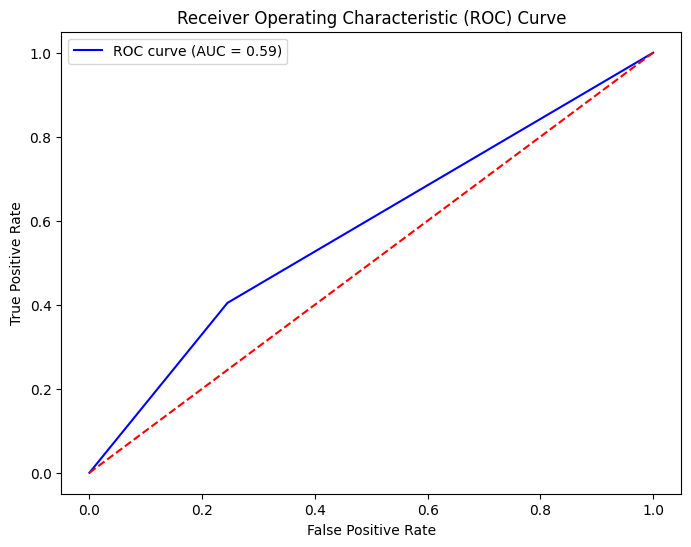

In [141]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [167]:
X_test = X_test[['fsArea_L_OFC_ROI','fsLGI_L_OFC_ROI','fsArea_R_STSvp_ROI','fsLGI_R_STSvp_ROI']]

In [177]:
y_predict_test = logreg.predict(X_test)

In [179]:
acc = logreg.score(X_test, y_test)
print(classification_report(y_test, y_predict_test))
acc

              precision    recall  f1-score   support

         0.0       0.58      0.77      0.66       104
         1.0       0.62      0.40      0.49        97

    accuracy                           0.59       201
   macro avg       0.60      0.59      0.57       201
weighted avg       0.60      0.59      0.58       201



0.5920398009950248

In [181]:
fpr, tpr, threshold = roc_curve(y_test, y_predict_test)
auc = auc(fpr, tpr)

In [183]:
auc

0.5856463124504361

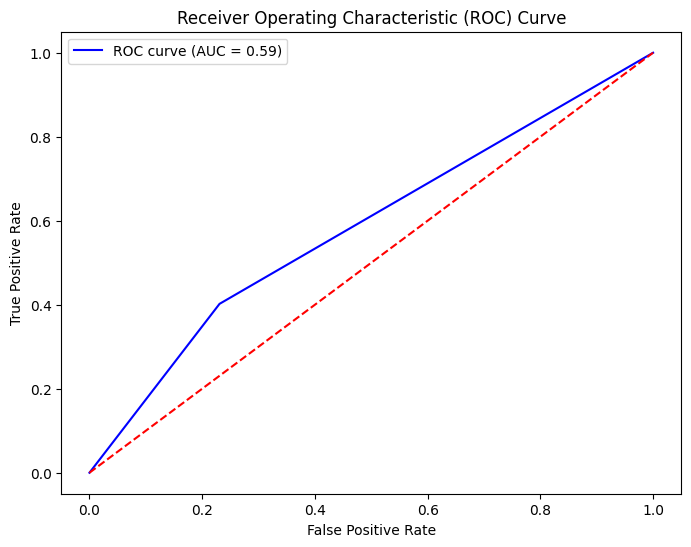

In [185]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()